# <span style='background:yellow'>Data Science Classification Project: Predicting Heart Disease</span>

# Importing Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import tree

 # Loading Test & Train Dataset

In [4]:
dataset = pd.read_csv('heart_train.csv')
test = pd.read_csv('heart_test.csv')

In [5]:
dataset.shape

(10247, 18)

In [6]:
test.shape

(569, 18)

In [7]:
dataset.head(2)

,HeartDisease,Sex,Age,Race,BodyMassIndex,Smoking,AlcoholDrinking,SleepingHours,GeneticHealth,DifficultiesWalking,PhysicalActivity,DaysSickLastMonth,DaysBadMoodLastMonth,Diabetic,Asthma,Stroke,KidneyDisease,SkinCancer
0,No,Male,75-79,B,26.29,Yes,No,6.0,Fair,No,Yes,0.0,15.0,No,No,No,No,No
1,No,Male,80 or older,B,26.63,Yes,No,8.0,Fair,No,Yes,0.0,0.0,No,No,Yes,No,Yes


In [8]:
dataset.columns

Index(['HeartDisease', 'Sex', 'Age', 'Race', 'BodyMassIndex', 'Smoking',
       'AlcoholDrinking', 'SleepingHours', 'GeneticHealth',
       'DifficultiesWalking', 'PhysicalActivity', 'DaysSickLastMonth',
       'DaysBadMoodLastMonth', 'Diabetic', 'Asthma', 'Stroke', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

# Dropping race Column from both train & test 
* ### as this column is not so imporatant for our model 

In [9]:
dataset.drop('Race', inplace=True, axis=1)
test.drop('Race', inplace=True, axis=1)

In [10]:
print(dataset.shape)
print(test.shape)

(10247, 17)
(569, 17)


# Dropping DaysBadMoodLastMonth Columns

In [11]:
dataset.drop('DaysBadMoodLastMonth', inplace=True, axis=1)
test.drop('DaysBadMoodLastMonth', inplace=True, axis=1)

In [12]:
print(dataset.shape)
print(test.shape)

(10247, 16)
(569, 16)


In [75]:
dataset.head()

,HeartDisease,Sex,Age,BodyMassIndex,Smoking,AlcoholDrinking,SleepingHours,GeneticHealth,DifficultiesWalking,PhysicalActivity,DaysSickLastMonth,Diabetic,Asthma,Stroke,KidneyDisease,SkinCancer
0,No,Male,75-79,26.29,Yes,No,6.0,Fair,No,Yes,0.0,No,No,No,No,No
1,No,Male,80 or older,26.63,Yes,No,8.0,Fair,No,Yes,0.0,No,No,Yes,No,Yes
2,Yes,Female,55-59,77.73,Yes,No,6.0,Good,Yes,No,5.0,Yes,No,No,No,No
3,Yes,Male,70-74,29.41,Yes,No,8.0,Fair,Yes,Yes,0.0,Yes,No,No,No,Yes
4,Yes,Female,75-79,47.55,Yes,No,6.0,Fair,Yes,No,30.0,Yes,No,No,Yes,No


In [76]:
test.head()

,HeartDisease,Sex,Age,BodyMassIndex,Smoking,AlcoholDrinking,SleepingHours,GeneticHealth,DifficultiesWalking,PhysicalActivity,DaysSickLastMonth,Diabetic,Asthma,Stroke,KidneyDisease,SkinCancer
0,Yes,Female,70-74,22.46,Yes,No,6.0,Fair,No,Yes,0.0,No,No,Yes,No,No
1,Yes,Male,65-69,31.46,Yes,No,8.0,Very good,No,Yes,2.0,Yes,No,No,No,No
2,Yes,Male,65-69,32.28,Yes,No,7.0,Very good,No,Yes,3.0,Yes,No,No,No,Yes
3,No,Female,80 or older,23.30,Yes,No,6.0,Excellent,No,No,0.0,No,No,No,No,No
4,No,Male,65-69,19.91,No,No,6.0,Excellent,No,Yes,0.0,Yes,No,No,No,No


# Creating Dummies Variable for both datasets

In [15]:
df1 = pd.get_dummies(dataset)
tf1 = pd.get_dummies(test)

In [16]:
print(df1.shape)
print(tf1.shape)

(10247, 45)
(569, 45)


In [17]:
df1.head(2)

,BodyMassIndex,SleepingHours,DaysSickLastMonth,HeartDisease_No,HeartDisease_Yes,Sex_Female,Sex_Male,Age_18-24,Age_25-29,Age_30-34,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),Asthma_No,Asthma_Yes,Stroke_No,Stroke_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,26.29,6.0,0.0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,26.63,8.0,0.0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,1


In [18]:
tf1.head(2)
tf1.shape

(569, 45)

In [19]:
df1.columns

Index(['BodyMassIndex', 'SleepingHours', 'DaysSickLastMonth',
       'HeartDisease_No', 'HeartDisease_Yes', 'Sex_Female', 'Sex_Male',
       'Age_18-24', 'Age_25-29', 'Age_30-34', 'Age_35-39', 'Age_40-44',
       'Age_45-49', 'Age_50-54', 'Age_55-59', 'Age_60-64', 'Age_65-69',
       'Age_70-74', 'Age_75-79', 'Age_80 or older', 'Smoking_No',
       'Smoking_Yes', 'AlcoholDrinking_No', 'AlcoholDrinking_Yes',
       'GeneticHealth_Excellent', 'GeneticHealth_Fair', 'GeneticHealth_Good',
       'GeneticHealth_Poor', 'GeneticHealth_Very good',
       'DifficultiesWalking_No', 'DifficultiesWalking_Yes',
       'PhysicalActivity_No', 'PhysicalActivity_Yes', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'Asthma_No', 'Asthma_Yes',
       'Stroke_No', 'Stroke_Yes', 'KidneyDisease_No', 'KidneyDisease_Yes',
       'SkinCancer_No', 'SkinCancer_Yes'],
      dtype='object')

# Separation of Numerical Columns from Dataset

In [20]:
df2 = df1[['BodyMassIndex', 'SleepingHours', 'DaysSickLastMonth']]
tf2 = tf1[['BodyMassIndex', 'SleepingHours', 'DaysSickLastMonth']]

In [21]:
print(df2.shape)
print(tf2.shape)

(10247, 3)
(569, 3)


# Dropping Numerical Columns from Dataset for separating categorical data

In [22]:
df3 = df1.drop(['BodyMassIndex', 'SleepingHours', 'DaysSickLastMonth'], axis = 1)
tf3 = tf1.drop(['BodyMassIndex', 'SleepingHours', 'DaysSickLastMonth'], axis = 1)

In [23]:
print(df3.shape)
print(tf3.shape)

(10247, 42)
(569, 42)


# Scaling of both test and train data for Numerical Columns

In [25]:
scale = StandardScaler()

In [26]:
scaled_df2 = scale.fit_transform(df2)
scaled_tf2 = scale.fit_transform(tf2)

In [27]:
print(scaled_df2)

[[-3.68612730e-01 -7.55532963e-01 -5.19257114e-01]
 [-3.14658692e-01  5.68216079e-01 -5.19257114e-01]
 [ 7.79431589e+00 -7.55532963e-01 -5.95108387e-03]
 ...
 [-1.10810043e+00  5.68216079e-01 -5.19257114e-01]
 [-8.97044929e-01 -7.55532963e-01 -3.13934702e-01]
 [-8.43090890e-01 -9.36584420e-02 -2.11273496e-01]]


In [28]:
print(scaled_tf2)

[[-0.96995643 -0.58827707 -0.63037109]
 [ 0.30153227  0.71417294 -0.44652632]
 [ 0.41737901  0.06294794 -0.35460393]
 ...
 [-0.26639935  0.06294794 -0.63037109]
 [-0.4514716   0.06294794 -0.63037109]
 [-1.08721595 -0.58827707 -0.35460393]]


In [29]:
print(scaled_df2.shape)
print(scaled_tf2.shape)

(10247, 3)
(569, 3)


# Converting numpy array to pandas Dataframe(for concatinating)

In [30]:
scaled_df2 = pd.DataFrame(scaled_df2, columns = ['BodyMassIndex', 'SleepingHours', 'DaysSickLastMonth'])
scaled_tf2 = pd.DataFrame(scaled_tf2, columns = ['BodyMassIndex', 'SleepingHours', 'DaysSickLastMonth'])

In [31]:
scaled_df2.head()

,BodyMassIndex,SleepingHours,DaysSickLastMonth
0,-0.368613,-0.755533,-0.519257
1,-0.314659,0.568216,-0.519257
2,7.794316,-0.755533,-0.005951
3,0.126495,0.568216,-0.519257
4,3.005102,-0.755533,2.560579


In [32]:
scaled_tf2.head()

,BodyMassIndex,SleepingHours,DaysSickLastMonth
0,-0.969956,-0.588277,-0.630371
1,0.301532,0.714173,-0.446526
2,0.417379,0.062948,-0.354604
3,-0.851284,-0.588277,-0.630371
4,-1.330212,-0.588277,-0.630371


# Concatinating separates dataset to form one single dataset for both

In [33]:
df4=pd.concat([scaled_df2, df3], axis=1)
tf4=pd.concat([scaled_tf2, tf3], axis=1)

In [34]:
df4.head(4)

,BodyMassIndex,SleepingHours,DaysSickLastMonth,HeartDisease_No,HeartDisease_Yes,Sex_Female,Sex_Male,Age_18-24,Age_25-29,Age_30-34,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),Asthma_No,Asthma_Yes,Stroke_No,Stroke_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,-0.368613,-0.755533,-0.519257,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,-0.314659,0.568216,-0.519257,1,0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,1
2,7.794316,-0.755533,-0.005951,0,1,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,0.126495,0.568216,-0.519257,0,1,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1


In [35]:
tf4.head(4)

,BodyMassIndex,SleepingHours,DaysSickLastMonth,HeartDisease_No,HeartDisease_Yes,Sex_Female,Sex_Male,Age_18-24,Age_25-29,Age_30-34,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),Asthma_No,Asthma_Yes,Stroke_No,Stroke_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,-0.969956,-0.588277,-0.630371,0,1,1,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
1,0.301532,0.714173,-0.446526,0,1,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,0.417379,0.062948,-0.354604,0,1,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1
3,-0.851284,-0.588277,-0.630371,1,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


# Checking null value

In [36]:
df4.isnull().sum()

BodyMassIndex                       0
SleepingHours                       0
DaysSickLastMonth                   0
HeartDisease_No                     0
HeartDisease_Yes                    0
Sex_Female                          0
Sex_Male                            0
Age_18-24                           0
Age_25-29                           0
Age_30-34                           0
Age_35-39                           0
Age_40-44                           0
Age_45-49                           0
Age_50-54                           0
Age_55-59                           0
Age_60-64                           0
Age_65-69                           0
Age_70-74                           0
Age_75-79                           0
Age_80 or older                     0
Smoking_No                          0
Smoking_Yes                         0
AlcoholDrinking_No                  0
AlcoholDrinking_Yes                 0
GeneticHealth_Excellent             0
GeneticHealth_Fair                  0
GeneticHealt

In [37]:
tf4.head(4)

BodyMassIndex                       0
SleepingHours                       0
DaysSickLastMonth                   0
HeartDisease_No                     0
HeartDisease_Yes                    0
Sex_Female                          0
Sex_Male                            0
Age_18-24                           0
Age_25-29                           0
Age_30-34                           0
Age_35-39                           0
Age_40-44                           0
Age_45-49                           0
Age_50-54                           0
Age_55-59                           0
Age_60-64                           0
Age_65-69                           0
Age_70-74                           0
Age_75-79                           0
Age_80 or older                     0
Smoking_No                          0
Smoking_Yes                         0
AlcoholDrinking_No                  0
AlcoholDrinking_Yes                 0
GeneticHealth_Excellent             0
GeneticHealth_Fair                  0
GeneticHealt

# Separating Dependent variable and independent variable

In [81]:
y_train = df4[['HeartDisease_No', 'HeartDisease_Yes']]
X_train = df4.drop(['HeartDisease_No', 'HeartDisease_Yes'],axis=1)
y_test = tf4[['HeartDisease_No', 'HeartDisease_Yes']]
X_test = tf4.drop(['HeartDisease_No', 'HeartDisease_Yes'],axis=1)

# Drop last column from independent(X)
* # for avoinding dummy variable trap


In [82]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(10247, 43)
(10247, 2)
(569, 43)
(10247, 2)


In [83]:
X_train = X_train.drop('SkinCancer_Yes',axis=1)
X_test = X_test.drop('SkinCancer_Yes',axis=1)

In [84]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(10247, 42)
(10247, 2)
(569, 42)
(10247, 2)


# Also Drop one column from dependent(y) as it has only two columns

* ## for avoiding dummy variable trap, it's necessary to drop

In [85]:
y_train = y_train['HeartDisease_No']
y_test = y_test['HeartDisease_No']

In [86]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(10247, 42)
(10247,)
(569, 42)
(10247,)


# Creating KNN model

In [87]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [88]:
y_pred = classifier.predict(X_test)

In [89]:
y_pred.shape

(569,)

In [90]:
y_pred = pd.DataFrame(y_pred, columns = ['HeartDisease_No'])

In [91]:
y_pred.head(10)

,HeartDisease_No
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [92]:
y_test.head(10)

0    0
1    0
2    0
3    1
4    1
5    0
6    0
7    0
8    0
9    1
Name: HeartDisease_No, dtype: uint8

# Calculating Confusion Matrix Result

In [93]:
confusion_matrix(y_test, y_pred)

array([[300,  62],
       [ 60, 147]])

/home/sahil/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


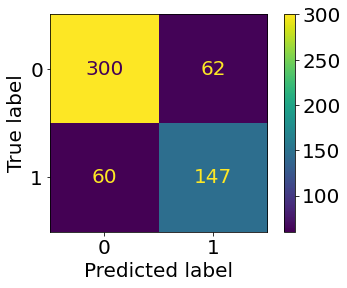

In [94]:
plot_confusion_matrix(classifier, X_test, y_test)
plt.grid(False)

# Accuracy

In [95]:
accuracy_KNN= accuracy_score(y_test, y_pred)
print("Accuracy of KNN = ", accuracy_KNN)

Accuracy of KNN =  0.7855887521968365


# Creating Decision Tree Classifier

In [96]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [97]:
y_pred_DT = model.predict(X_test)

In [98]:
y_pred_DT.shape

(569,)

In [99]:
y_pred_DT = pd.DataFrame(y_pred_DT, columns = ['HeartDisease_No'])

In [100]:
y_pred_DT.head(10)

,HeartDisease_No
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,1
8,1
9,1


# Confusion Matrix

In [101]:
confusion_matrix(y_test, y_pred_DT)

array([[250, 112],
       [ 71, 136]])

/home/sahil/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


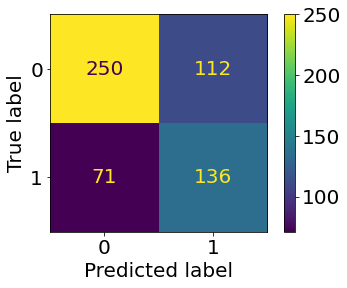

In [102]:
plot_confusion_matrix(model, X_test, y_test)
plt.grid(False)

# Accuracy

In [103]:
accuracy_DT= accuracy_score(y_test, y_pred_DT)
print("Accuracy of Decision Tree Regression = ", accuracy_DT)

Accuracy of Decision Tree Regression =  0.6783831282952548


# Creating Logistic Regression 

In [104]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)

/home/sahil/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
y_pred_LR = Log_reg.predict(X_test)

# Confusion Matrix 

In [106]:
confusion_matrix(y_test, y_pred_LR)

array([[283,  79],
       [ 50, 157]])

/home/sahil/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


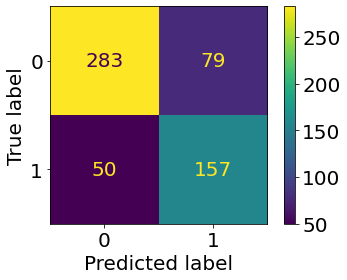

In [107]:
plot_confusion_matrix(Log_reg, X_test, y_test)
plt.grid(False)

# Accuracy

In [108]:
accuracy_LR= accuracy_score(y_test, y_pred_LR)
print("Accuracy of Logistic Regression = ", accuracy_LR)

Accuracy of Logistic Regression =  0.773286467486819


# Plotting Individual Model Accuracy 

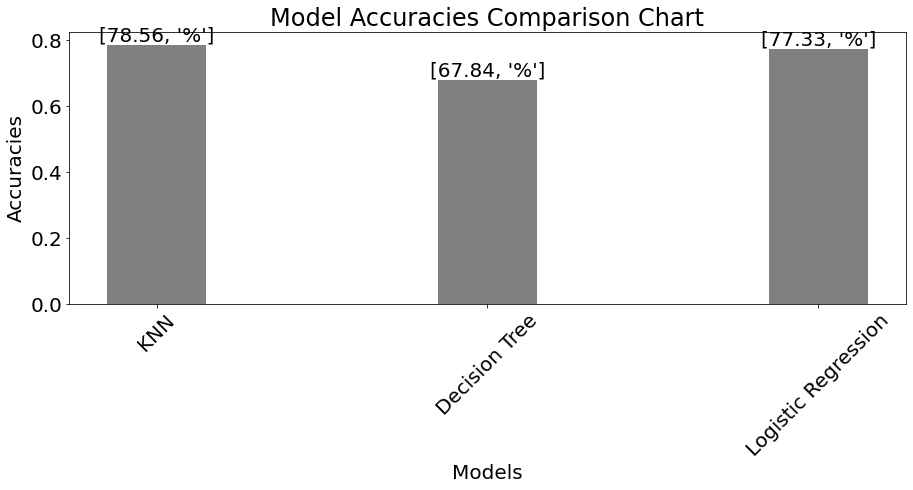

In [109]:
models = ["KNN",'Decision Tree' , "Logistic Regression"]
accuracies = [accuracy_KNN, accuracy_DT, accuracy_LR]

fig, ax = plt.subplots(figsize=(15,5))

ax.bar(models, accuracies,
       width=0.3,color='gray')
plt.xticks(rotation=45)
plt.title("Model Accuracies Comparison Chart")
plt.xlabel("Models")
plt.ylabel("Accuracies")
for i in range(len(models)):
    ax.text(i, accuracies[i], [(accuracies[i]*100).round(2), "%"], ha="center", va="bottom")
plt.rcParams.update({'font.size': 20})
plt.show()